## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Doron 7446
# student 2: Niva 1561
# student 3: Sharon 0601
# student 4: Dor 3433

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
def load_csv(url):
    df = pd.read_csv(url)
    return df

In [4]:
train_titanic = load_csv("titanic_train.csv")
test_titanic = load_csv("titanic_test.csv")
display(train_titanic.head())
display(test_titanic.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
y_train = train_titanic['Survived']
x_train = train_titanic.drop(['Survived'],axis=1)
y_test = test_titanic['Survived']
x_test = test_titanic.drop(['Survived'],axis=1)

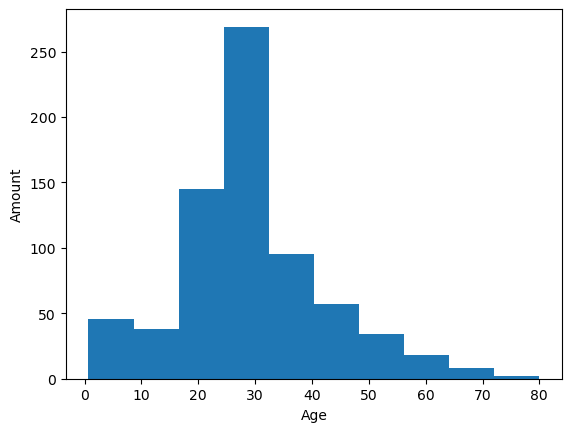

In [6]:
plt.hist(train_titanic.Age)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

([<matplotlib.patches.Wedge at 0x20cbfdc5690>,
 [Text(-1.0403159874899557, -0.35741103252809436, 'didnt Survived'),
  Text(1.0403159874899557, 0.35741103252809464, 'Survived')],
 [Text(-0.5674450840854304, -0.19495147228805146, '60.5%'),
  Text(0.5674450840854303, 0.19495147228805162, '39.5%')])

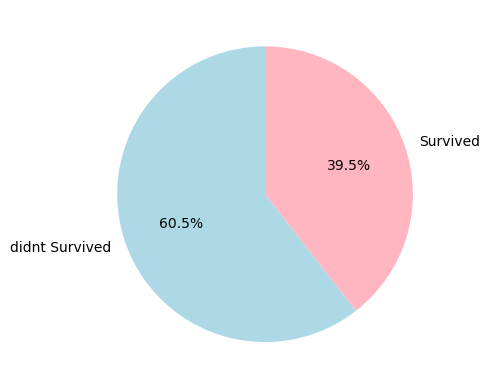

In [7]:
survival_counts = train_titanic['Survived'].value_counts()
plt.pie(survival_counts, labels=['didnt Survived','Survived'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])

In [8]:
def cross_tabulation(df,col1,col2,rows_names,cols_names):
    ct1 = pd.crosstab(df[col1],df[col2],normalize='index')
    ct1.index = rows_names
    ct1.index.name = col1
    ct1.columns = cols_names
    ct1.columns.name = col2
    return ct1

In [9]:
cross_tabulation(train_titanic,'Survived','Sex',['Didnt Survived','Survived'],['Male','Female'])

Sex,Male,Female
Survived,,
Didnt Survived,0.146172,0.853828
Survived,0.686833,0.313167


In [10]:
cross_tabulation(train_titanic,'Survived','Embarked',['Didnt Survived','Survived'],['0','1','2','3'])

Embarked,0,1,2,3
Survived,,,,
Didnt Survived,0.772622,0.134571,0.092807,0.000000
Survived,0.640569,0.270463,0.085409,0.003559


In [11]:
def MinMacScaling(X_train,X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled,X_test_scaled

In [12]:
X_train_scaled,X_test_scaled = MinMacScaling(x_train,x_test)

In [13]:
def knnPredict(k,dist_metric):
    knn = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    knn.fit(X_train_scaled,y_train)

In [14]:
def knnPredict_no_scaling(k,dist_metric):
    knn = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    knn.fit(x_train,y_train)

In [15]:
knnPredict(3,'manhattan')
knnPredict_no_scaling(3,'manhattan')

In [16]:
knnPredict(3,'chebyshev')
knnPredict_no_scaling(3,'chebyshev')

In [17]:
knnPredict(7,'manhattan')
knnPredict_no_scaling(7,'manhattan')

In [18]:
knnPredict(7,'chebyshev')
knnPredict_no_scaling(7,'chebyshev')

In [19]:
def dec_tree(crit,Maxdepth):
    clf = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    clf.fit(X_train_scaled, y_train)
   

In [20]:
def dec_tree_no_scaling(crit,Maxdepth):
    clf = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    clf.fit(x_train, y_train)

In [21]:
tree1 = dec_tree('entropy',3)
dec_tree_no_scaling('entropy',3)

In [22]:
tree2 = dec_tree('entropy',7)
dec_tree_no_scaling('entropy',7)

In [23]:
tree3 = dec_tree('gini',3)
dec_tree_no_scaling('gini',3)

In [24]:
tree4 = dec_tree('gini',7)
dec_tree_no_scaling('gini',7)

In [25]:
def grid_knn():
    model=KNeighborsClassifier()
    param_grid = {
    'metric': ['manhattan', 'chebyshev'],
    'n_neighbors': [3, 7]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [26]:
grid_knn()

({'metric': 'manhattan', 'n_neighbors': 3}, 0.7977839062346105)

In [27]:
def grid_tree():
    model=DecisionTreeClassifier()
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [28]:
grid_tree()

({'criterion': 'gini', 'max_depth': 3}, 0.8075642667191962)

In [29]:
def f1_score_knn(k,dist_metric):
    model = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    scores_valid = cross_val_score(model,X_train_scaled,y_train,cv=5)
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    print(score_f1,scores_valid.mean())
    return score_f1,scores_valid.mean()

In [30]:
def f1_score_tree(crit,Maxdepth):
    model = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    
    scores_valid = cross_val_score(model,X_train_scaled,y_train,cv=5)
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [31]:
def f1_score_knn_no_scaling(k,dist_metric):
    model = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    scores_valid = cross_val_score(model,x_train,y_train,cv=5)
    y_pred = cross_val_predict(model, x_train, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [32]:
def f1_score_tree_no_scaling(crit,Maxdepth):
    model = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    scores_valid = cross_val_score(model,x_train,y_train,cv=5)
    y_pred = cross_val_predict(model, x_train, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [33]:
# 3, 7 , manhattan, chebyshev
data = [{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0}
]
stat_scores = pd.DataFrame(data)
for i in stat_scores.index:
    param_1 = stat_scores.loc[i, 'Hyper_Parameter_1']
    param_2 = stat_scores.loc[i, 'Hyper_Parameter_2']
    if i <= 3:
        f1_s, score_val = f1_score_knn(param_1, param_2)
    else:
        f1_s,score_val = f1_score_tree(param_2, param_1)
    stat_scores.loc[i, 'f1_score'] = f1_s
    stat_scores.loc[i, 'Cross_Validation_Mean_Score'] = score_val
display(stat_scores)

0.7966322791896748 0.7977839062346105
0.7861344597878606 0.7893529006205062
0.7781876104629679 0.7795134443021767
0.7842780793670834 0.7865359992120555


,model,Hyper_Parameter_1,Hyper_Parameter_2,f1_score,Cross_Validation_Mean_Score
0,knn,3,manhattan,0.796632,0.797784
1,knn,7,manhattan,0.786134,0.789353
2,knn,3,chebyshev,0.778188,0.779513
3,knn,7,chebyshev,0.784278,0.786536
4,Dec Tree,3,entropy,0.799063,0.801940
5,Dec Tree,7,entropy,0.797615,0.800542
6,Dec Tree,3,gini,0.805307,0.807564
7,Dec Tree,7,gini,0.779924,0.785137


In [34]:
data = [{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
{'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0}
]
stat_scores_no_scaling = pd.DataFrame(data)
for i in stat_scores_no_scaling.index:
    param_1 = stat_scores_no_scaling.loc[i, 'Hyper_Parameter_1']
    param_2 = stat_scores_no_scaling.loc[i, 'Hyper_Parameter_2']
    if i <= 3:
        f1_s, score_val = f1_score_knn_no_scaling(param_1, param_2)
    else:
        f1_s,score_val = f1_score_tree_no_scaling(param_2, param_1)
    stat_scores_no_scaling.loc[i, 'f1_score'] = f1_s
    stat_scores_no_scaling.loc[i, 'Cross_Validation_Mean_Score'] = score_val
display(stat_scores_no_scaling)

,model,Hyper_Parameter_1,Hyper_Parameter_2,f1_score,Cross_Validation_Mean_Score
0,knn,3,manhattan,0.721832,0.724732
1,knn,7,manhattan,0.730348,0.733222
2,knn,3,chebyshev,0.681353,0.683965
3,knn,7,chebyshev,0.691337,0.695253
4,Dec Tree,3,entropy,0.799063,0.801940
5,Dec Tree,7,entropy,0.796509,0.800552
6,Dec Tree,3,gini,0.806641,0.808963
7,Dec Tree,7,gini,0.783320,0.783739


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [35]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

## Part 4 - Apply on test and show model performance estimation

In [36]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324022346368715


In [37]:
print(y_pred[:10]) # first classification

[0 0 0 1 0 0 1 0 1 0]


In [38]:
cm = (confusion_matrix(y_test, y_pred))
cmdf=pd.DataFrame(cm)
print("Confusion Matrix:")

cmdf.index = ['Actual False','Actual True']
cmdf.columns = ['Predicted False','Predicted True']
display(cmdf)

Confusion Matrix:


,Predicted False,Predicted True
Actual False,111,7
Actual True,23,38


In [39]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8444444444444444
Recall: 0.6229508196721312


In [40]:
f1_s,cv_mean = f1_score_tree('gini',3)
print(f"f1_score = {f1_s}")
print(f"cross validation = {cv_mean}")

f1_score = 0.8053074173444678
cross validation = 0.8075642667191962
